In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure project root is added so "src" is importable
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Now import from the src package
from src.data_scraper import PlayStoreScraper
from src.data_preprocessing import ReviewPreprocessor


In [2]:
print("🚀 Starting Scraper...\n")

# Initialize scraper
scraper = PlayStoreScraper()

# Run the scraper (correct method)
raw_df = scraper.scrape_all_banks()

print("\n✅ Scraping Finished.\n")

# Display results
display(raw_df.head())

🚀 Starting Scraper...

Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.318943
Total Ratings: 38861
Total Reviews: 8336

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.191589
Total Ratings: 6353
Total Reviews: 1219

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.158416
Total Ratings: 3910
Total Reviews: 771

App information saved to c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 500 reviews
Collected 500 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:04<00:08,  4.24s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 500 reviews
Collected 500 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:10<00:05,  5.44s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 500 reviews
Collected 500 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


Scraping Complete!

Total reviews collected: 1500
Reviews per bank:
  Commercial Bank of Ethiopia: 500
  Bank of Abyssinia: 500
  Dashen Bank: 500

Data saved to: c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\data/raw/reviews_raw.csv

✅ Scraping Finished.



,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,Yohannesb Adugna,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


In [2]:
preprocessor = ReviewPreprocessor()
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
    display(df.head())
else:
    print("\n❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1500 reviews

[1/7] Checking for missing data...

Missing values:
  reply_content: 1498 (99.87%)
  app_id: 337 (22.47%)

[2/7] Handling missing values...

[3/7] Normalizing dates...
Date range: 2024-08-04 to 2025-11-29

[4/6] Cleaning text...
Removed 99 reviews with non-English, empty, or very short text (<3 chars)

[5/7] Removing duplicate reviews...
Removed 2 duplicate reviews

[6/7] Validating ratings...
All ratings are valid (1-5)

[7/7] Preparing final output...
Final dataset: 1399 reviews

Saving processed data...
Data saved to: c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1500
Records with missing critical data: 0
Empty reviews removed: 99
Duplicate reviews removed: 2
Invalid ratings removed: 0
Final records: 1399

Data retention rate: 93.27%
Data error rate: 6.73%
✓ Data quality: GOOD (<10% errors)

Reviews per bank:
  Dashen

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Wariyo Dida,0,9,Google Play
1,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Hailegebrail Tegegn,0,4,Google Play
2,11306fb9-5571-4950-8d32-604c5402242f,good,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Tsegay ab,0,4,Google Play
3,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,BOA,Bank of Abyssinia,Yohanis Fikadu,0,8,Google Play
4,f28a3a3c-eb94-4aab-88d2-89bcecebcc7b,bad exprience it is so crushed,1,2025-11-27,2025,11,BOA,Bank of Abyssinia,ሻንበል ኪዳነ,0,30,Google Play


C:\Users\amare\AppData\Local\Temp\ipykernel_11204\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\amare\AppData\Local\Temp\ipykernel_11204\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


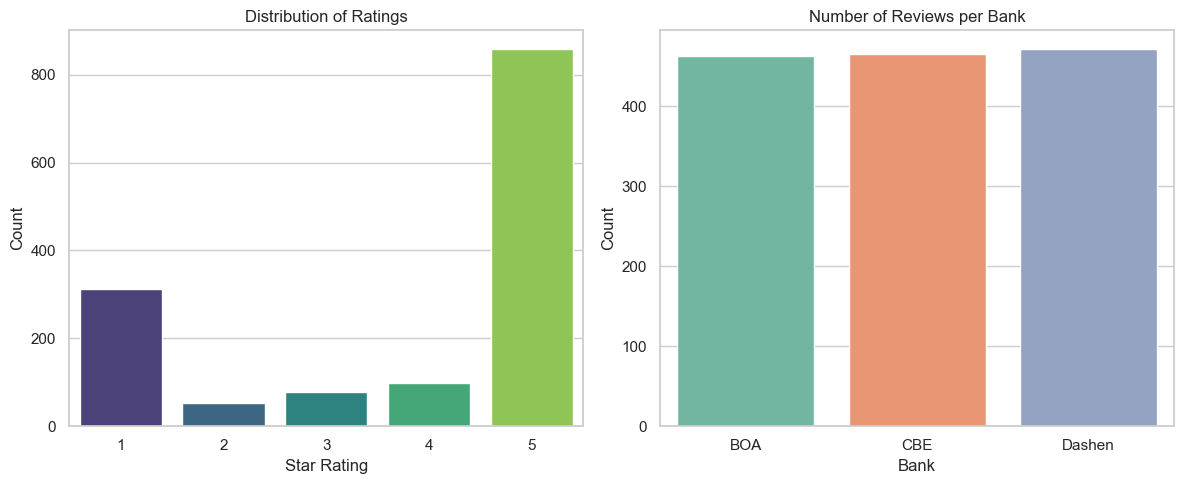

In [9]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

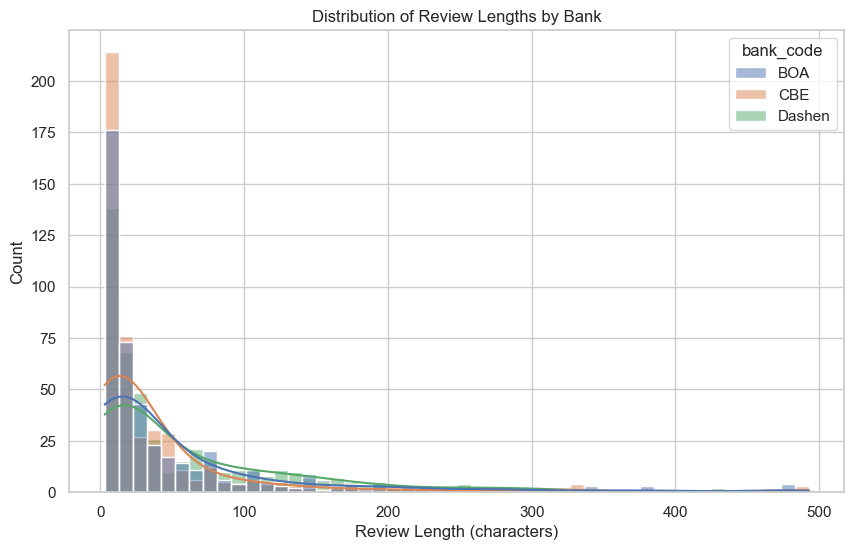

In [10]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()